# 1 . Import

In [ ]:
 # System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# Tools
import itertools
from collections import Counter

# NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical


# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential

# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D

# Deep Learning Model - Keras - RNN
from keras.layers import Embedding, LSTM, Bidirectional

# Deep Learning Model - Keras - General
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply



# Deep Learning Parameters - Keras
from tensorflow.keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print(os.listdir("/content/drive/MyDrive/input"))

['spam.csv']


# 2 . Functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today() 

# 3 . Read Data

In [ ]:
input_directory = r"../input/"
output_directory = r"../output/"

if not os.path.exists(output_directory):
    os.mkdir(output_directory)
    
figure_directory = "../output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)
    
    
file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/input/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
df = df.rename(columns={"v1":"label", "v2":"text"})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df_new = df.copy()
df_stat = df.copy()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
lmm = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer('english')

stop_words = set(stopwords.words('english'))

In [ ]:
#df_new['parsed'] = df_new['text'].apply(lambda x: x.lower())
#df_new['parsed'] = df_new['parsed'].apply(lambda x: word_tokenize(x))

 #df_new['no_stop'] = df_new['parsed'].apply(lambda x: [word for word in str(x).split() if word not in stop_words])

 #df_new['stem'] = df_new['no_stop'].apply(lambda x: [snowball_stemmer.stem(word) for word in x])
 #df_new['stem'] =  df_new['stem'].apply(lambda x: " ".join(x))

 #df_new['lemi'] =  df_new['no_stop'].apply(lambda x: " ".join(x))
 #df_new['lemi'] =  df_new['lemi'].apply(lambda x: lmm.lemmatize(x))

 #3df_new['parsed'] = df_new['parsed'].apply(lambda x: ' '.join(x))
 #df_new['no_stop'] = df_new['no_stop'].apply(lambda x: ' '.join(x))
 #df_new['stem'] = df_new['stem'].apply(lambda x: ' '.join(x))
 #df_new['lemi'] = df_new['lemi'].apply(lambda x: ' '.join(x))

 #df_new.head()

In [ ]:
df_stat["text_clean"] = df_stat["text"].apply(lambda x: re.sub("[^a-zA-Z]", " ", x.lower()))

df_stat["length"] = df_stat["text"].apply(lambda x: len(x))
df_stat["token_count"] = df_stat["text"].apply(lambda x: len(x.split(" ")))
df_stat["unique_token_count"] = df_stat["text"].apply(lambda x: len(set(x.lower().split(" "))))
df_stat["unique_token_count_percent"] = df_stat["unique_token_count"]/df_stat["token_count"]

df_stat["length_clean"] = df_stat["text_clean"].apply(lambda x: len(x))
df_stat["token_count_clean"] = df_stat["text_clean"].apply(lambda x: len(x.split(" ")))

df_stat.head()

,label,text,text_clean,length,token_count,unique_token_count,unique_token_count_percent,length_clean,token_count_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only ...,111,20,20,1.000000,111,29
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,29,6,6,1.000000,29,12
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...,155,28,24,0.857143,155,59
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,49,11,10,0.909091,49,17
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,61,13,12,0.923077,61,15


# 4 . Visualization

ham     4825
spam     747
Name: label, dtype: int64

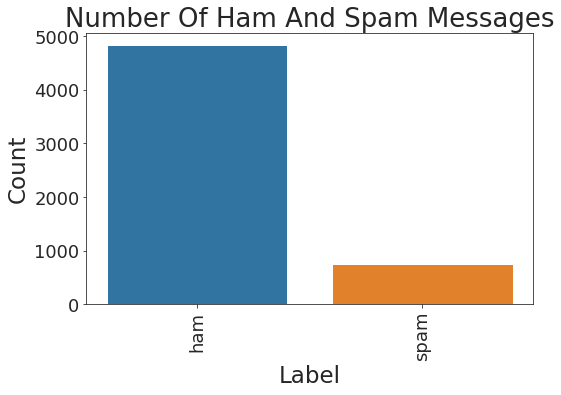

In [ ]:
sns.set_style("ticks")
figsize=(8, 5)
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5
xlabel = "Label"
ylabel = "Count"
title = "Number of ham and spam messages"
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}
plt.rcParams.update(params)
col1 = "label"
col2 = "label"
sns.countplot(x=df[col1])
plt.title(title.title())
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()
df.label.value_counts()

In [ ]:
print(params)

{'figure.figsize': (8, 5), 'axes.labelsize': 23, 'axes.titlesize': 26, 'xtick.labelsize': 18, 'ytick.labelsize': 18}


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

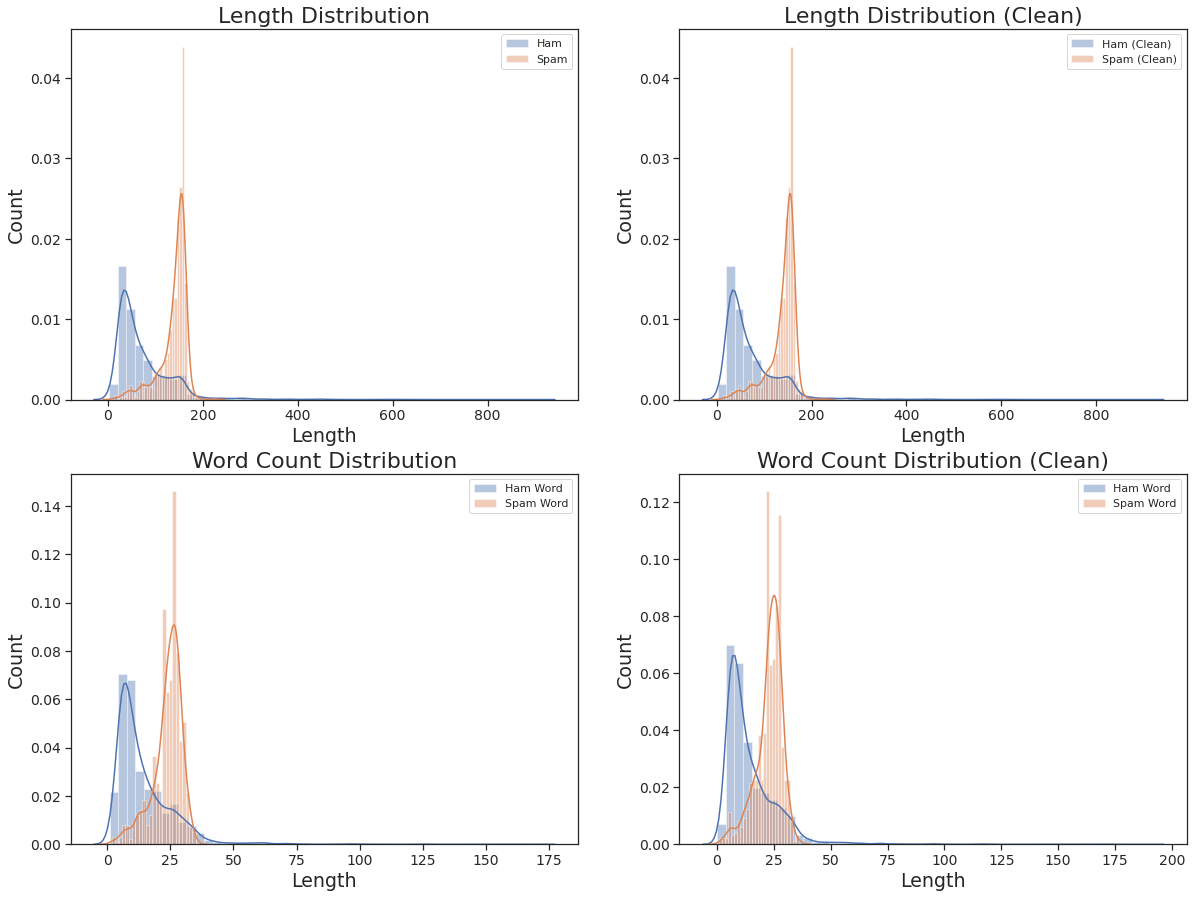

In [ ]:
s1 = df_stat[df_stat['label'] == 'ham']['text'].str.len()
s2 = df_stat[df_stat['label'] == 'spam']['text'].str.len()
s3 = df_stat[df_stat['label'] == 'ham']['text_clean'].str.len()
s4 = df_stat[df_stat['label'] == 'spam']['text_clean'].str.len()
s5 = df_stat[df_stat['label'] == 'ham']['text'].str.split().str.len()
s6 = df_stat[df_stat['label'] == 'spam']['text'].str.split().str.len()
s7 = df_stat[df_stat['label'] == 'ham']['text_clean'].str.split().str.len()
s8 = df_stat[df_stat['label'] == 'spam']['text_clean'].str.split().str.len()

sns.set()
sns.set_style("ticks")

figsize=(20, 15)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Length"
ylabel = "Count"

title1 = "Length Distribution"
title2 = "Length Distribution (Clean)"
title3 = "Word Count Distribution"
title4 = "Word Count Distribution (Clean)"



params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)
#fig.subplots_adjust(hspace=0.5, wspace=0.5)

col1 = "len"
col2 = "label"
plt.subplot(221)
sns.distplot(s1, label='Ham')
sns.distplot(s2, label='Spam')
plt.title(title1.title())
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()

plt.subplot(222)
sns.distplot(s3, label='Ham (Clean)')
sns.distplot(s4, label='Spam (Clean)')
plt.title(title2.title())
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()

plt.subplot(223)
sns.distplot(s5, label='Ham Word')
sns.distplot(s6, label='Spam Word')
plt.title(title3.title())
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()

plt.subplot(224)
sns.distplot(s7, label='Ham Word')
sns.distplot(s8, label='Spam Word')
plt.title(title4.title())
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.show()

# 5 . Preprocessing

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df["text"],df["label"], test_size = 0.2, random_state = 10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


# 6 . Feature Extraction

In [ ]:
vect = CountVectorizer()
X_train_df = vect.fit_transform(X_train)
X_test_df = vect.transform(X_test)

In [ ]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[20:])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703']
['0578', '06', '07', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '0796xxxxxx', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700469649', '08700621170150p', '08701213186', '08701417012', '08701417012150p', '0870141701216', '087016248

# 7 . Model Trainning

In [ ]:
models = {
    "SVC": svm.SVC(kernel="linear"),
    "MultinomialNB": MultinomialNB(),
}
prediction = dict()
score_map = {}

for model_name in models:
    model = models[model_name]
    model.fit(X_train_df,y_train)
    prediction[model_name] = model.predict(X_test_df)
    score = accuracy_score(y_test, prediction[model_name])
    score_map[model_name] = score
#     print("{}{}{}".format(model_name, ": ", score))

In [ ]:
result = pd.DataFrame()
result["model"] = score_map.keys()
result["score"] = score_map.values()
result["score"] = result["score"].apply(lambda x: x*100)

In [ ]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(3, 5)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance"

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)

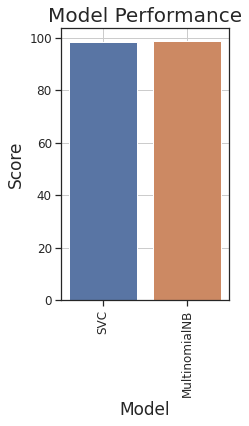

           model      score
0            SVC  98.385650
1  MultinomialNB  98.834081


In [ ]:
plot_model_performace(result)

# 8 . Hyper Parameter Search

In [ ]:
param_grid = {
    "C": np.concatenate(
        [
            np.arange(0.0001, 0.001, 0.0001),
            np.arange(0.001, 0.01, 0.001),
            np.arange(0.01, 0.1, 0.01),
            np.arange(0.1, 1, 0.1),
            np.arange(1, 10, 1),
            np.arange(10, 100, 5)
        ],
        axis=None),
    
    "kernel": ("linear", "rbf", "poly", "sigmoid"),
#     "kernel": ("linear", "poly"),
#     "degree": list(np.arange(1,25, 1)),
#     "gamma": np.concatenate(
#         [
#             np.arange(0.0001, 0.001, 0.0001),
#             np.arange(0.001, 0.01, 0.001),
#             np.arange(0.01, 0.1, 0.01),
#             np.arange(0.1, 1, 0.1),
#             np.arange(1, 10, 1),
#             np.arange(10, 100, 5)
#         ],
#         axis=None)
}
# print(param_grid)
# model = svm.SVC(class_weight="balanced")
# grid = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1, cv=3)
# grid.fit(X_train_df,y_train)
# print("{}{}".format("Best Estimator: ", grid.best_estimator_))
# print("{}{}".format("Best Params: ", grid.best_params_))
# print("{}{}".format("Best Scores: ", grid.best_score_))

In [ ]:
param_grid = {
    "alpha": np.concatenate(
        [
            np.arange(0.0001, 0.001, 0.0001),
            np.arange(0.001, 0.01, 0.001),
            np.arange(0.01, 0.1, 0.01),
            np.arange(0.1, 1, 0.1),
            np.arange(1, 10, 1),
            np.arange(10, 100, 5)
        ]) 
}

model = MultinomialNB()
grid_cv_model = GridSearchCV(model, param_grid, n_jobs=-1, verbose=3, cv=3)
grid_cv_model.fit(X_train_df, y_train)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


GridSearchCV(cv=3, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([1.0e-04, 2.0e-04, 3.0e-04, 4.0e-04, 5.0e-04, 6.0e-04, 7.0e-04,
       8.0e-04, 9.0e-04, 1.0e-03, 2.0e-03, 3.0e-03, 4.0e-03, 5.0e-03,
       6.0e-03, 7.0e-03, 8.0e-03, 9.0e-03, 1.0e-02, 2.0e-02, 3.0e-02,
       4.0e-02, 5.0e-02, 6.0e-02, 7.0e-02, 8.0e-02, 9.0e-02, 1.0e-01,
       2.0e-01, 3.0e-01, 4.0e-01, 5.0e-01, 6.0e-01, 7.0e-01, 8.0e-01,
       9.0e-01, 1.0e+00, 2.0e+00, 3.0e+00, 4.0e+00, 5.0e+00, 6.0e+00,
       7.0e+00, 8.0e+00, 9.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 2.5e+01,
       3.0e+01, 3.5e+01, 4.0e+01, 4.5e+01, 5.0e+01, 5.5e+01, 6.0e+01,
       6.5e+01, 7.0e+01, 7.5e+01, 8.0e+01, 8.5e+01, 9.0e+01, 9.5e+01])},
             verbose=3)

# 9 . Evaluation Metrics

In [ ]:
print("{}{}".format("Best Estimator: ", grid_cv_model.best_estimator_))
print("{}{}".format("Best Params:    ", grid_cv_model.best_params_))
print("{}{}".format("Best Scores:    ", grid_cv_model.best_score_))

Best Estimator: MultinomialNB(alpha=0.08)
Best Params:    {'alpha': 0.08}
Best Scores:    0.980928471193164


In [ ]:
print(classification_report(y_test, prediction['MultinomialNB'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.97      0.95      0.96       150

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
def plot_confusion_matrix(y_test, y_pred, title=""):
    conf_mat = confusion_matrix(y_test, y_pred)
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

#     sns.set_style("ticks")
    figsize=(13, 5)

    ticksize = 18
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Predicted label"
    ylabel = "True label"


    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    plt.subplot(121)
    sns.heatmap(conf_mat, annot=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(122)
    sns.heatmap(conf_mat_normalized, annot=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


    print("Confusion Matrix:\n")
    print(conf_mat)
    print("\n\nConfusion Matrix Normalized:\n")
    print(conf_mat_normalized)

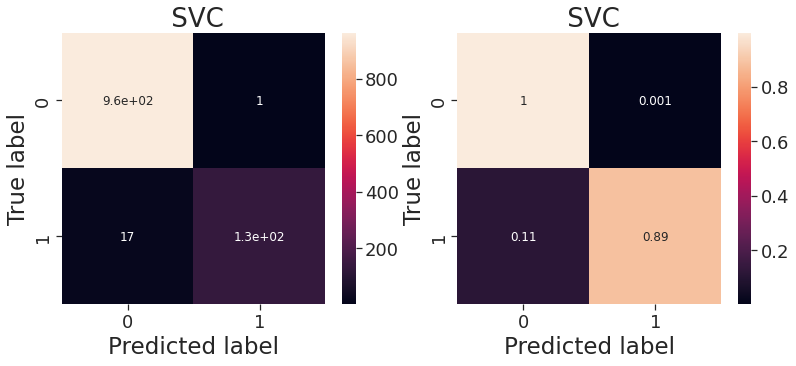

Confusion Matrix:

[[964   1]
 [ 17 133]]


Confusion Matrix Normalized:

[[0.99896373 0.00103627]
 [0.11333333 0.88666667]]


In [ ]:
plot_confusion_matrix(y_test, prediction['SVC'], title=" SVC")

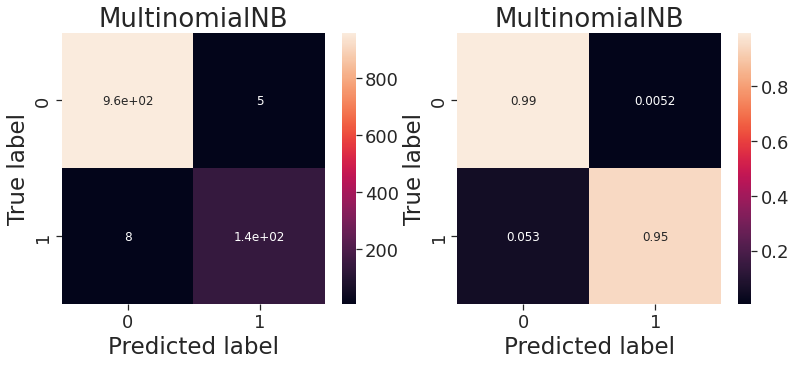

Confusion Matrix:

[[960   5]
 [  8 142]]


Confusion Matrix Normalized:

[[0.99481865 0.00518135]
 [0.05333333 0.94666667]]


In [ ]:
plot_confusion_matrix(y_test, prediction['MultinomialNB'], title="MultinomialNB")

In [ ]:
X_test[y_test < prediction["MultinomialNB"] ]

573                                Waiting for your call.
4727    I (Career Tel) have added u as a contact on IN...
5475    Dhoni have luck to win some big title.so we wi...
4860                               Nokia phone is lovly..
1259    We have sent JD for Customer Service cum Accou...
Name: text, dtype: object

In [ ]:
X_test[y_test > prediction["MultinomialNB"] ]

5035    You won't believe it but it's true. It's Incre...
2574    Your next amazing xxx PICSFREE1 video will be ...
3130    LookAtMe!: Thanks for your purchase of a video...
68      Did you hear about the new \Divorce Barbie\"? ...
2662    Hello darling how are you today? I would love ...
4211    Missed call alert. These numbers called but le...
3572    You won't believe it but it's true. It's Incre...
3979                                   ringtoneking 84484
Name: text, dtype: object

# 10 . Deep Learning

## Output Configuration

In [ ]:
main_model_dir = output_directory + r"models/"
main_log_dir = output_directory + r"logs/"

try:
    os.mkdir(main_model_dir)
except:
    print("Could not create main model directory")
    
try:
    os.mkdir(main_log_dir)
except:
    print("Could not create main log directory")



model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')


try:
    os.mkdir(model_dir)
except:
    print("Could not create model directory")
    
try:
    os.mkdir(log_dir)
except:
    print("Could not create log directory")
    
model_file = model_dir + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

Could not create main model directory
Could not create main log directory


In [ ]:
print("Settting Callbacks")

checkpoint = ModelCheckpoint(
    model_file, 
    monitor='val_acc', 
    save_best_only=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=1,
    restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.6,
    patience=1,
    verbose=1)


callbacks = [checkpoint, reduce_lr, early_stopping]

# callbacks = [early_stopping]

print("Set Callbacks at ", date_time(1))

Settting Callbacks
Set Callbacks at  Timestamp: 2022-06-29 03:39:22


## 10.1. Preprocessing

In [ ]:
X = df.text
Y = df.label

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

Y = Y.reshape(-1, 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()


In [ ]:
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
import sklearn

sklearn.__version__

'0.24.2'

In [ ]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 0.24.2
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2


In [ ]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
# Calculate Class Weights
def get_weight(y):
    class_weight_current =  cw.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

In [ ]:
class_weight = get_weight(Y_train.flatten())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [ ]:
type(class_weight)

numpy.ndarray

## 10.2 Model

In [ ]:
def get_cnn_model():   
    model = Sequential()
    
    model.add(Embedding(max_words, 50, input_length=max_len))
    
    model.add(Conv1D(64, 3, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    return model



def get_rnn_model():
    model = Sequential()
    
    model.add(Embedding(max_words, 50, input_length=max_len))
    model.add(LSTM(64))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    
    return model



In [ ]:
print(max_words)

14134


In [ ]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(17, 8))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()


In [ ]:
loss = 'binary_crossentropy'
metrics = ['accuracy']

## 10.3. Model Trainning

 10.3.1. CNN

In [ ]:
model2 = get_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 910, 50)           706700    
                                                                 
 conv1d (Conv1D)             (None, 908, 64)           9664      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

print("Training Model ...\n")

class_weight_dict = dict(enumerate(class_weight.flatten(), 0))

import tensorflow

my_callbacks = [
    tensorflow.keras.callbacks.EarlyStopping(patience=2),
    tensorflow.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tensorflow.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history2 = model2.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=my_callbacks,
    validation_split=validation_split,
    class_weight =class_weight_dict
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2022-06-29 03:39:35


Compliling Model ...

Training Model ...

Epoch 1/100
30/30 [==============================] - 15s 452ms/step - loss: 0.9199 - accuracy: 0.5451 - val_loss: 0.6417 - val_accuracy: 0.8650
Epoch 2/100
30/30 [==============================] - 17s 554ms/step - loss: 0.7149 - accuracy: 0.6280 - val_loss: 0.5141 - val_accuracy: 0.8650
Epoch 3/100
30/30 [==============================] - 17s 579ms/step - loss: 0.5105 - accuracy: 0.7328 - val_loss: 0.4046 - val_accuracy: 0.8650
Epoch 4/100
30/30 [==============================] - 12s 396ms/step - loss: 0.3324 - accuracy: 0.8300 - val_loss: 0.3523 - val_accuracy: 0.8650
Epoch 5/100
30/30 [==============================] - 9s 300ms/step - loss: 0.2481 - accuracy: 0.8992 - val_loss: 0.3388 - val_accuracy: 0.8650
Epoch 6/100
30/30 [==============================] - 9s 290ms/step - loss: 0.1898 - accuracy: 0.9298 - val_loss: 0.3275 - val_accuracy: 0.8650
Epoch 7/100
30/30 [==============================]

#### 10.3.1.1 Visualization

In [ ]:
plot_performance(history=history2)



> ### 10.3.2. RNN


In [ ]:
model1 = get_rnn_model()

In [ ]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

print("Trainning Model ...\n")

class_weight_dict = dict(enumerate(class_weight.flatten(), 0))

import tensorflow
my_callbacks = [
    tensorflow.keras.callbacks.EarlyStopping(patience=2),
    tensorflow.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tensorflow.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history1 = model1.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=my_callbacks,
    validation_split=validation_split,
    class_weight =class_weight_dict
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2022-06-29 03:44:20


Compliling Model ...

Trainning Model ...

Epoch 1/100
30/30 [==============================] - 40s 1s/step - loss: 0.7500 - accuracy: 0.5787 - val_loss: 0.5600 - val_accuracy: 0.8650
Epoch 2/100
30/30 [==============================] - 35s 1s/step - loss: 0.3663 - accuracy: 0.7719 - val_loss: 0.4129 - val_accuracy: 0.8650
Epoch 3/100
30/30 [==============================] - 35s 1s/step - loss: 0.1529 - accuracy: 0.9406 - val_loss: 0.2985 - val_accuracy: 0.8703
Epoch 4/100
30/30 [==============================] - 34s 1s/step - loss: 0.0937 - accuracy: 0.9776 - val_loss: 0.2883 - val_accuracy: 0.8650
Epoch 5/100
30/30 [==============================] - 35s 1s/step - loss: 0.0689 - accuracy: 0.9823 - val_loss: 0.2554 - val_accuracy: 0.8724
Epoch 6/100
30/30 [==============================] - 35s 1s/step - loss: 0.0427 - accuracy: 0.9931 - val_loss: 0.2581 - val_accuracy: 0.8681
Epoch 7/100
30/30 [==============================] - 34s 1s/step 

#### 10.3.2.1 Visualization


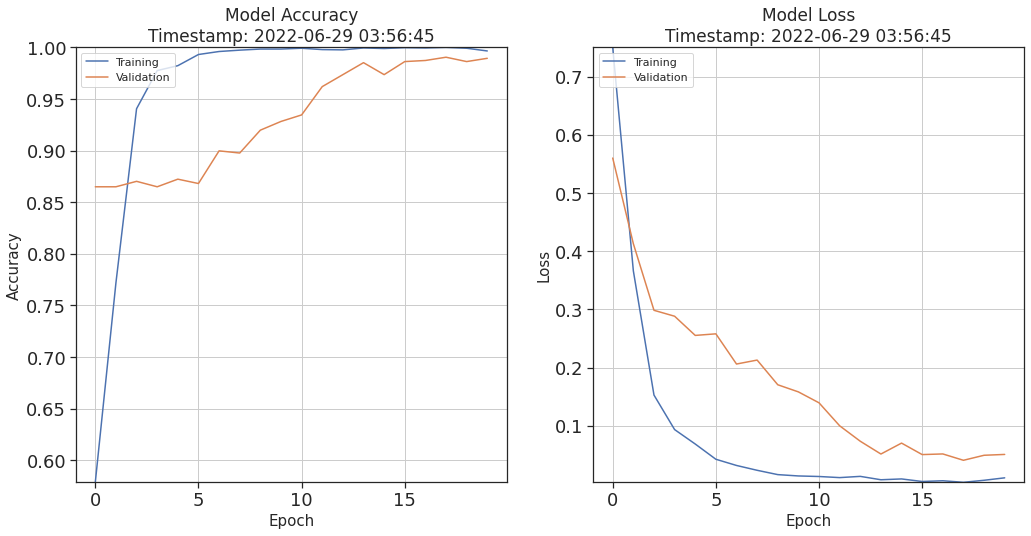

In [ ]:
plot_performance(history=history1)


# 11 . Inference/Prediction 

In [ ]:
test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
accuracy2 = model2.evaluate(test_X_seq, Y_test)
accuracy1 = model1.evaluate(test_X_seq, Y_test)

27/27 [==============================] - 3s 108ms/step - loss: 0.0892 - accuracy: 0.9797


# 12 . Evaluation

In [ ]:
print("Model Performance of RNN (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy1[1]*100, accuracy1[0]))

print("\nModel Performance of CNN (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy2[1]*100, accuracy2[0]))

Model Performance of RNN (Test Accuracy):
Accuracy: 97.97%
Loss: 0.089


Model Performance of CNN (Test Accuracy):
Accuracy: 98.56%
Loss: 0.050



In [ ]:
ypreds2 = model2.predict(test_X_seq, verbose=1)
ypreds1 = model1.predict(test_X_seq, verbose=1)

27/27 [==============================] - 3s 107ms/step


In [ ]:
print(classification_report(Y_test, np.round(abs(ypreds1)), target_names = ["ham", "spam"])) 

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       713
        spam       0.97      0.89      0.93       123

    accuracy                           0.98       836
   macro avg       0.98      0.94      0.96       836
weighted avg       0.98      0.98      0.98       836



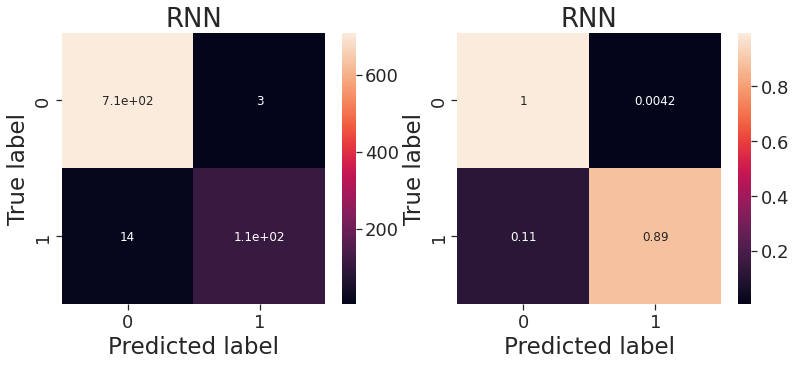

Confusion Matrix:

[[710   3]
 [ 14 109]]


Confusion Matrix Normalized:

[[0.99579243 0.00420757]
 [0.11382114 0.88617886]]


In [ ]:
plot_confusion_matrix(Y_test, np.round(abs(ypreds1)), title="RNN")

In [ ]:
print(classification_report(Y_test, np.round(abs(ypreds2)), target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       713
        Spam       0.97      0.93      0.95       123

    accuracy                           0.99       836
   macro avg       0.98      0.96      0.97       836
weighted avg       0.99      0.99      0.99       836



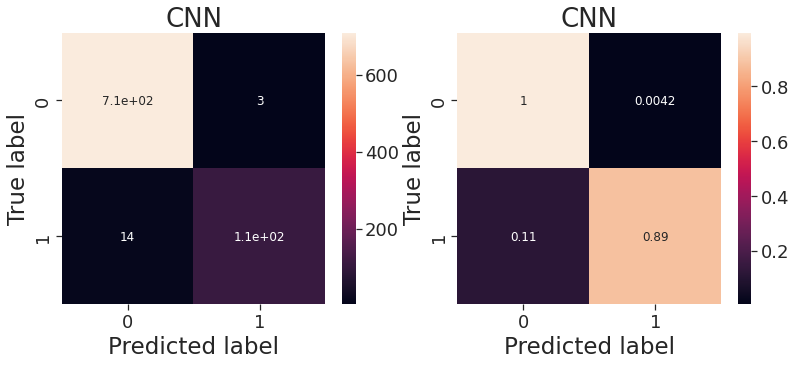

Confusion Matrix:

[[710   3]
 [ 14 109]]


Confusion Matrix Normalized:

[[0.99579243 0.00420757]
 [0.11382114 0.88617886]]


In [ ]:
plot_confusion_matrix(Y_test, np.round(abs(ypreds1)), title="CNN")

In [ ]:
row1 = pd.DataFrame({'model': 'RNN', 'score': accuracy1[1]*100}, index=[-1])
result = pd.concat([row1, result.loc[:]]).reset_index(drop=True)
row2 = pd.DataFrame({'model': 'CNN', 'score': accuracy2[1]*100}, index=[-1])
result = pd.concat([row2, result.loc[:]]).reset_index(drop=True)

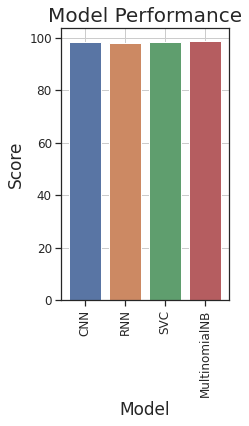

           model      score
0            CNN  98.564595
1            RNN  97.966510
2            SVC  98.385650
3  MultinomialNB  98.834081


In [ ]:
plot_model_performace(result)